In [1]:
# The user specifies if running notebook on GoogleColab or locally
UseGoogleColab = True

In [ ]:
if UseGoogleColab:
    from google.colab import drive
    drive.mount('/content/drive')
    USERDIR='/content/drive/MyDrive/hightea/'
else:
    USERDIR='.'

#Install hightea client and plotting library
%pip install hightea-client > /dev/null
%pip install hightea-plotting > /dev/null
from hightea.client import Interface as hightea
from hightea.plotting import plot,Run
import math
import numpy as np

This is an example demonstrating a polarization analysis in W+W- production.

Each polarization is considered as a separate calculation, each corresponding to a request to the HighTEA database.

In [3]:
jobs = {}

printit = True

for mode in ["LO-dpa-UU","LO-dpa-TT","LO-dpa-LL","LO-dpa-TL","LO-dpa-LT",
             "NLO-dpa-UU","NLO-dpa-TT","NLO-dpa-LL","NLO-dpa-TL","NLO-dpa-LT"]:

    print('Current mode: ',mode)

    jobs[mode] = hightea('WW-polarization-'+mode,directory=USERDIR,overwrite=False)
    jobs[mode].process('pp_ww_pol_13TeV',printit)
    printit=False

    jobs[mode].contribution(mode)

    jobs[mode].define_new_variable('a_lp','arctan2(p_lp_1,p_lp_2)')
    jobs[mode].define_new_variable('a_lm','arctan2(p_lm_1,p_lm_2)')
    jobs[mode].define_new_variable('dphi_ll','fabs(a_lp-a_lm)*(pi > fabs(a_lp-a_lm))+(2*pi-fabs(a_lp-a_lm))*(pi < fabs(a_lp-a_lm))')   

    jobs[mode].observable('dphi_ll',list(np.linspace(0,np.pi,11)))

    jobs[mode].request()

Current mode:  LO-dpa-UU
Remove data from : ./hightea-jobs/WW-polarization-LO-dpa-UU.job
   pp -> W+(-> e+ ve) W-(-> mu- vm~) + X at 13 TeV pol. 

Process tag         :  pp_ww_pol_13TeV  (use for process specification)
Momenta layout      :  ['lp', 'vp', 'lm', 'vm', ' j1', ' j2']
Default scales      :   muR = MT, muF = MT 
Default pdf         :  NNPDF31_nnlo_as_0118 / 0
Avail. contributions:  ['LO', 'LO-dpa-UU', 'LO-dpa-TT', 'LO-dpa-LL', 'LO-dpa-LT', 'LO-dpa-TL', 'NLO', 'NLO-dpa-UU', 'NLO-dpa-TT', 'NLO-dpa-LL', 'NLO-dpa-LT', 'NLO-dpa-TL']
Predefined variables
   pt_ep       :  sqrt(p_ep_1**2 + p_ep_2**2)
   Q_0         :  p_lp_0 + p_vp_0 + p_lm_0 + p_vm_0
   Q_1         :  p_lp_1 + p_vp_1 + p_lm_1 + p_vm_1
   Q_2         :  p_lp_2 + p_vp_2 + p_lm_2 + p_vm_2
   Q_3         :  p_lp_3 + p_vp_3 + p_lm_3 + p_vm_3
   Q           :  sqrt(Q_0**2 - Q_1**2 - Q_2**2 - Q_3**2)
   pT_Q        :  sqrt(Q_1**2 + Q_2**2)
   MT          :  sqrt(Q**2+pT_Q**2)
   HT          :  sqrt((p_lp_0+p_vp_0+p_lm_0+

Collect the data.

In [4]:
all_results_LO = []
for mode in ["LO-dpa-UU","LO-dpa-TT","LO-dpa-LL","LO-dpa-TL","LO-dpa-LT"]:
    all_results_LO.append(jobs[mode].result())
all_results_NLO = []
for mode in ["NLO-dpa-UU","NLO-dpa-TT","NLO-dpa-LL","NLO-dpa-TL","NLO-dpa-LT"]:
    all_results_NLO.append(jobs[mode].result())

Plot LO and NLO results.

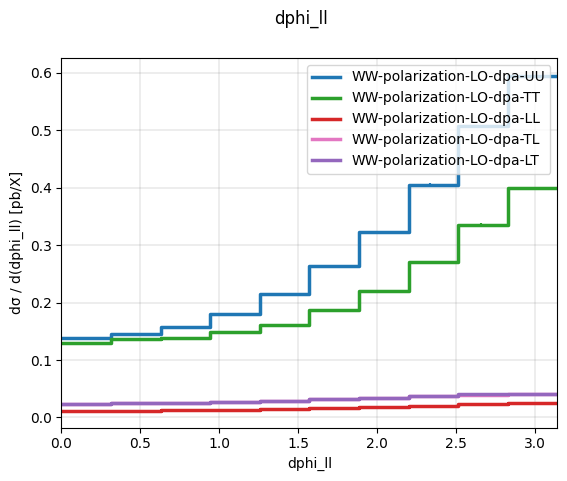

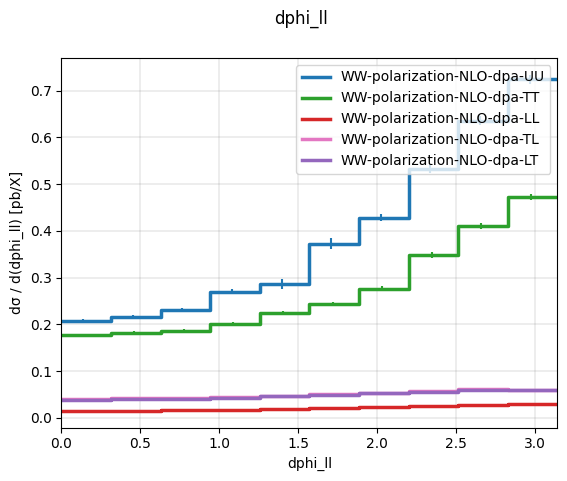

In [5]:
plot(all_results_LO);
plot(all_results_NLO);

Compute polarization fractions and NLO k-factors.

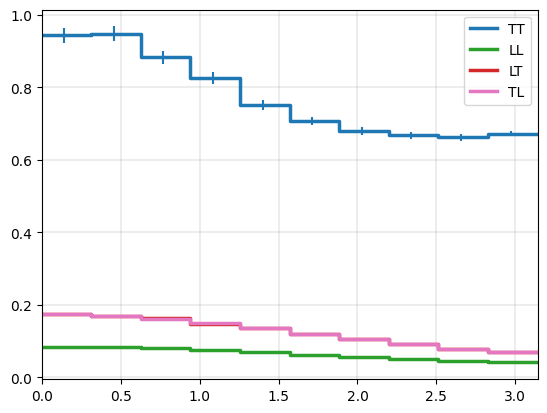

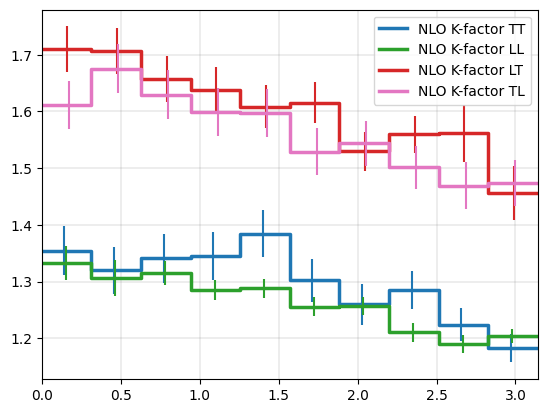

In [6]:
res_dpa    = Run(all_results_LO[0])
res_dpa_TT = Run(all_results_LO[1])
res_dpa_LL = Run(all_results_LO[2])
res_dpa_LT = Run(all_results_LO[3])
res_dpa_TL = Run(all_results_LO[4])

res_dpa_NLO    = Run(all_results_NLO[0])
res_dpa_TT_NLO = Run(all_results_NLO[1])
res_dpa_LL_NLO = Run(all_results_NLO[2])
res_dpa_LT_NLO = Run(all_results_NLO[3])
res_dpa_TL_NLO = Run(all_results_NLO[4])

rat_TT = res_dpa_TT/res_dpa
rat_TT.name = 'TT'
rat_LL = res_dpa_LL/res_dpa
rat_LL.name = 'LL'
rat_LT = res_dpa_LT/res_dpa
rat_LT.name = 'LT'
rat_TL = res_dpa_TL/res_dpa
rat_TL.name = 'TL'

kfactor_TT = res_dpa_TT_NLO/res_dpa_TT
kfactor_TT.name = 'NLO K-factor TT'
kfactor_TL = res_dpa_TL_NLO/res_dpa_TL
kfactor_TL.name = 'NLO K-factor TL'
kfactor_LT = res_dpa_LT_NLO/res_dpa_LT
kfactor_LT.name = 'NLO K-factor LT'
kfactor_LL = res_dpa_LL_NLO/res_dpa_LL
kfactor_LL.name = 'NLO K-factor LL'

plot(rat_TT,rat_LL,rat_LT,rat_TL);

plot(kfactor_TT,kfactor_LL,kfactor_LT,kfactor_TL);